In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression,LogisticRegression
import seaborn as sns
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
    accuracy_score,
    mean_absolute_error
)
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv("tested.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
age_mean=df['Age'].mean()
df['Age'] = df['Age'].fillna(age_mean)

In [9]:
age_mean=df['Fare'].mean()
df['Fare'] = df['Fare'].fillna(age_mean)

In [10]:
df["Embarked"].unique()

array(['Q', 'S', 'C'], dtype=object)

In [11]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [12]:
df['Embarked'] = df['Embarked'].map( 
    {'Q': 0,
    'S':1,
    'C':2}).astype(int)

In [13]:
df['Sex'] = df['Sex'].map(
     {'female': 1,
     'male':0}).astype(int)


In [14]:
df['Age'] = df["Age"].astype(int)

In [15]:
df['Fare'] = df["Fare"].astype(int)

In [16]:
df.drop(columns=['PassengerId','Name','Cabin','Ticket'], inplace=True)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


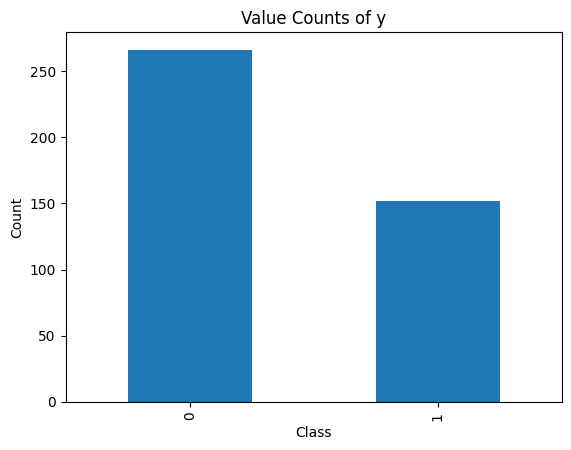

In [18]:
plt.figure()
df["Survived"].value_counts().plot(kind='bar')
plt.title('Value Counts of y')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show();

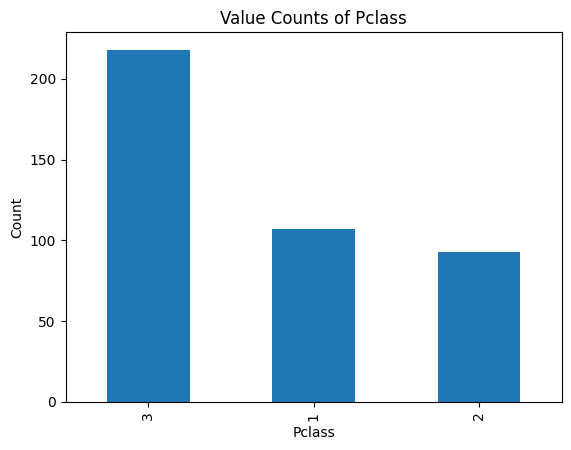

In [19]:
df["Pclass"].value_counts().plot(kind="bar")
plt.title('Value Counts of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show();

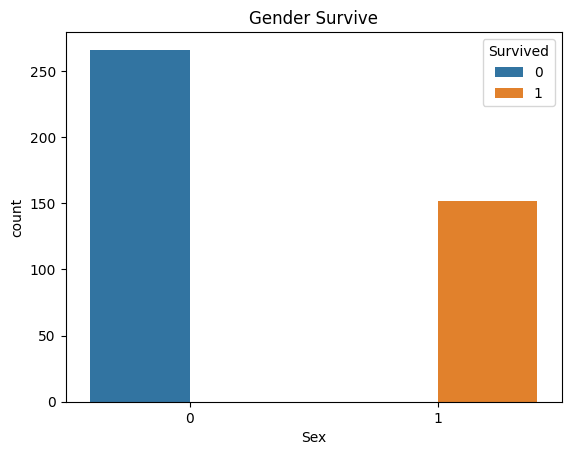

In [20]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Gender Survive')
plt.show()

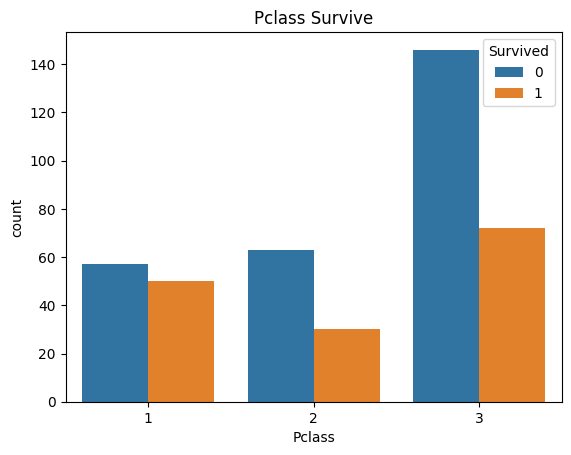

In [21]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Pclass Survive')
plt.show()

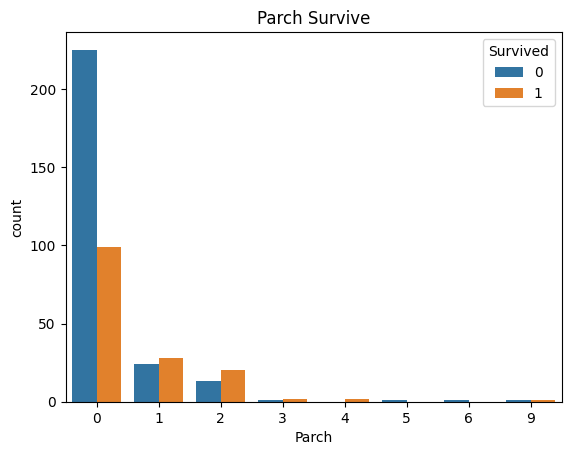

In [22]:
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Parch Survive')
plt.show()

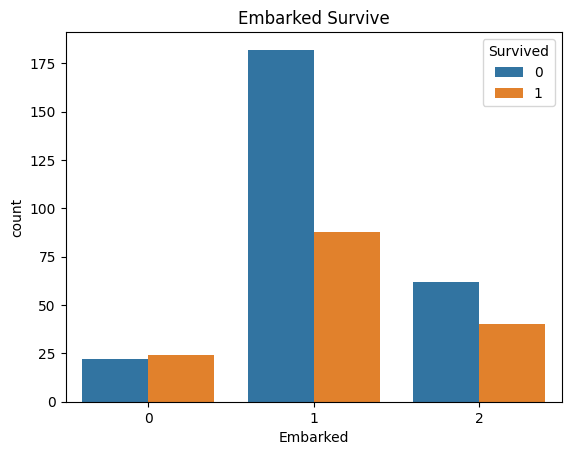

In [23]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Embarked Survive')
plt.show()

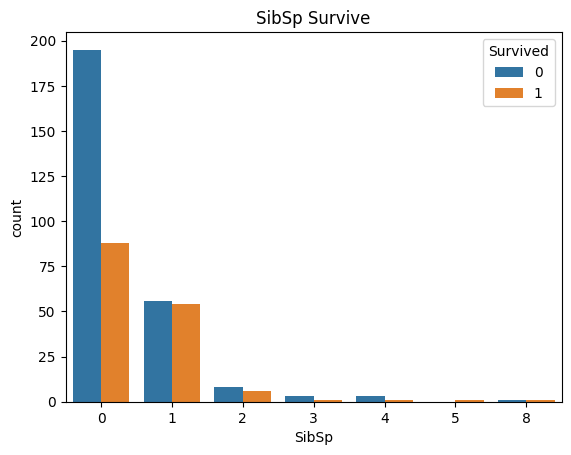

In [24]:
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('SibSp Survive')
plt.show()

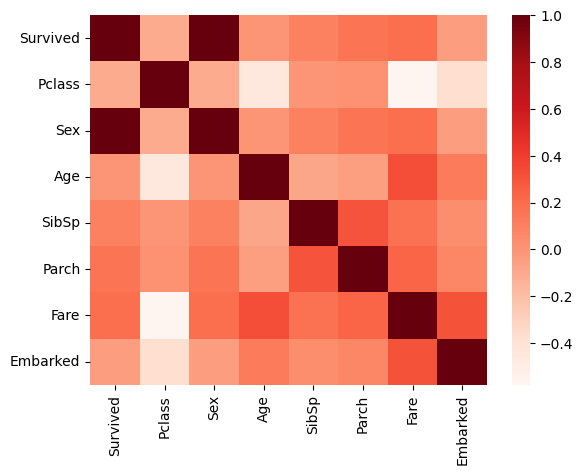

In [25]:
corr= df.corr()
sns.heatmap(corr,cmap='Reds');

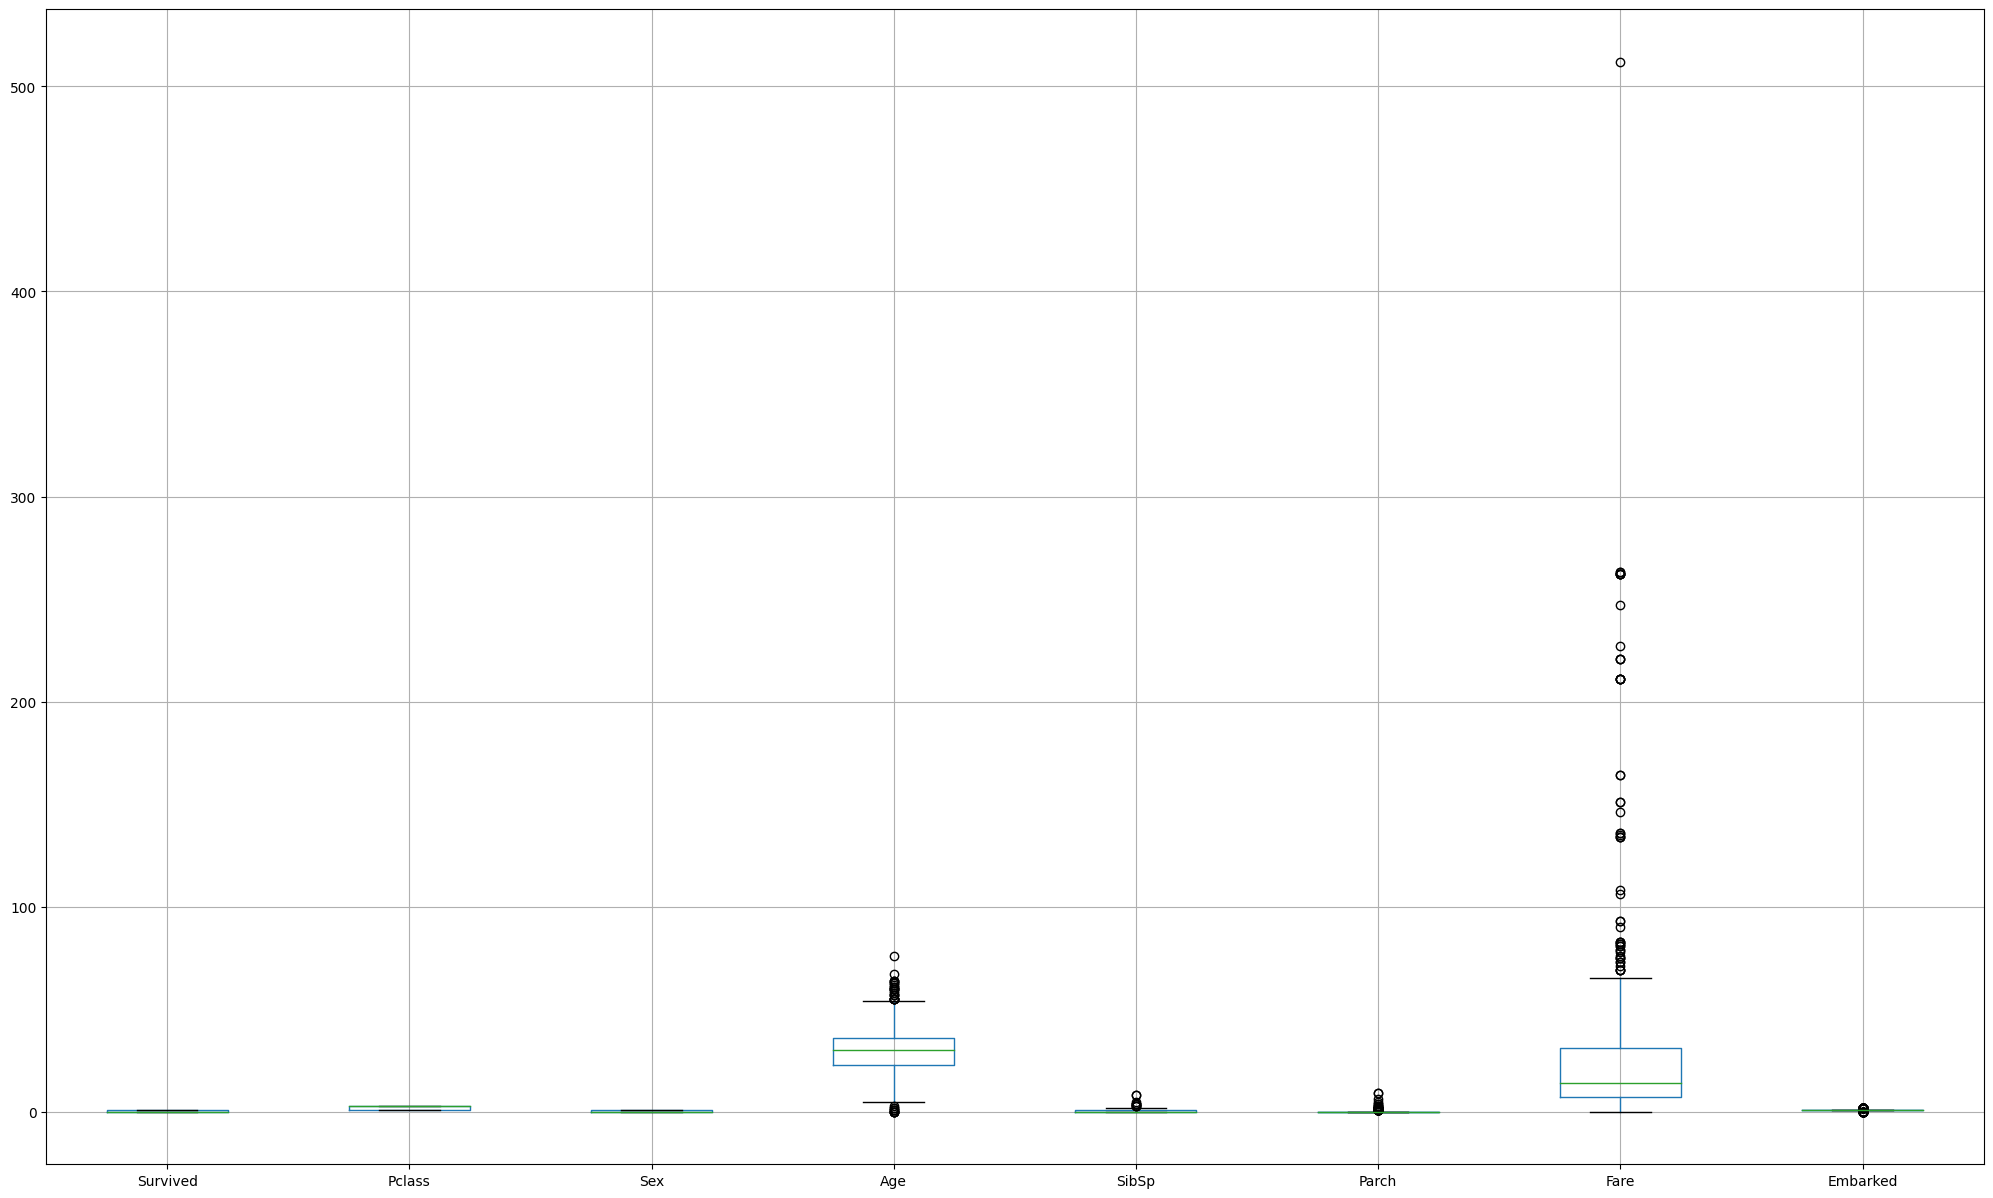

In [26]:
fig, ax = plt.subplots(figsize=(25, 15))
df.boxplot(ax=ax)
plt.show()

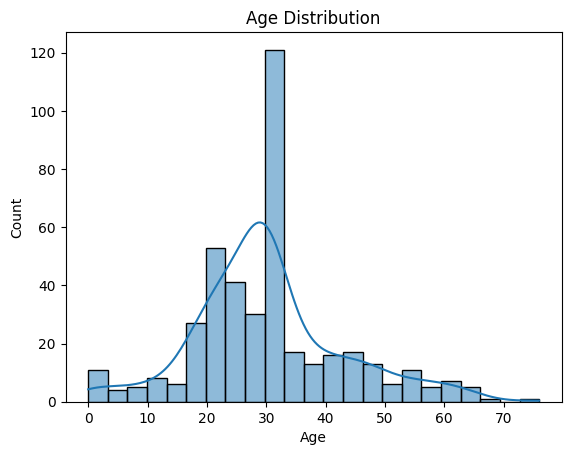

In [27]:
sns.histplot(x='Age', data=df,kde=True)
plt.title('Age Distribution')
plt.show()

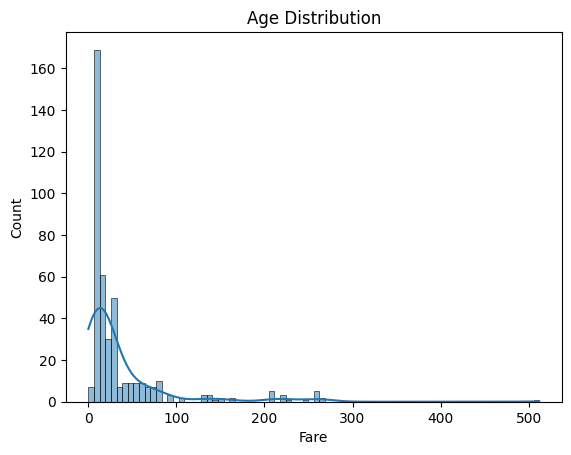

In [28]:
sns.histplot(x='Fare', data=df,kde=True)
plt.title('Age Distribution')
plt.show()

In [29]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr = q3 - q1

lower_range = q1 - 1.5 * iqr
upper_range = q3 + 1.5 * iqr

outlier_indices = df[(df['Fare'] < lower_range) | (df['Fare'] > upper_range)].index

df = df.drop(outlier_indices)

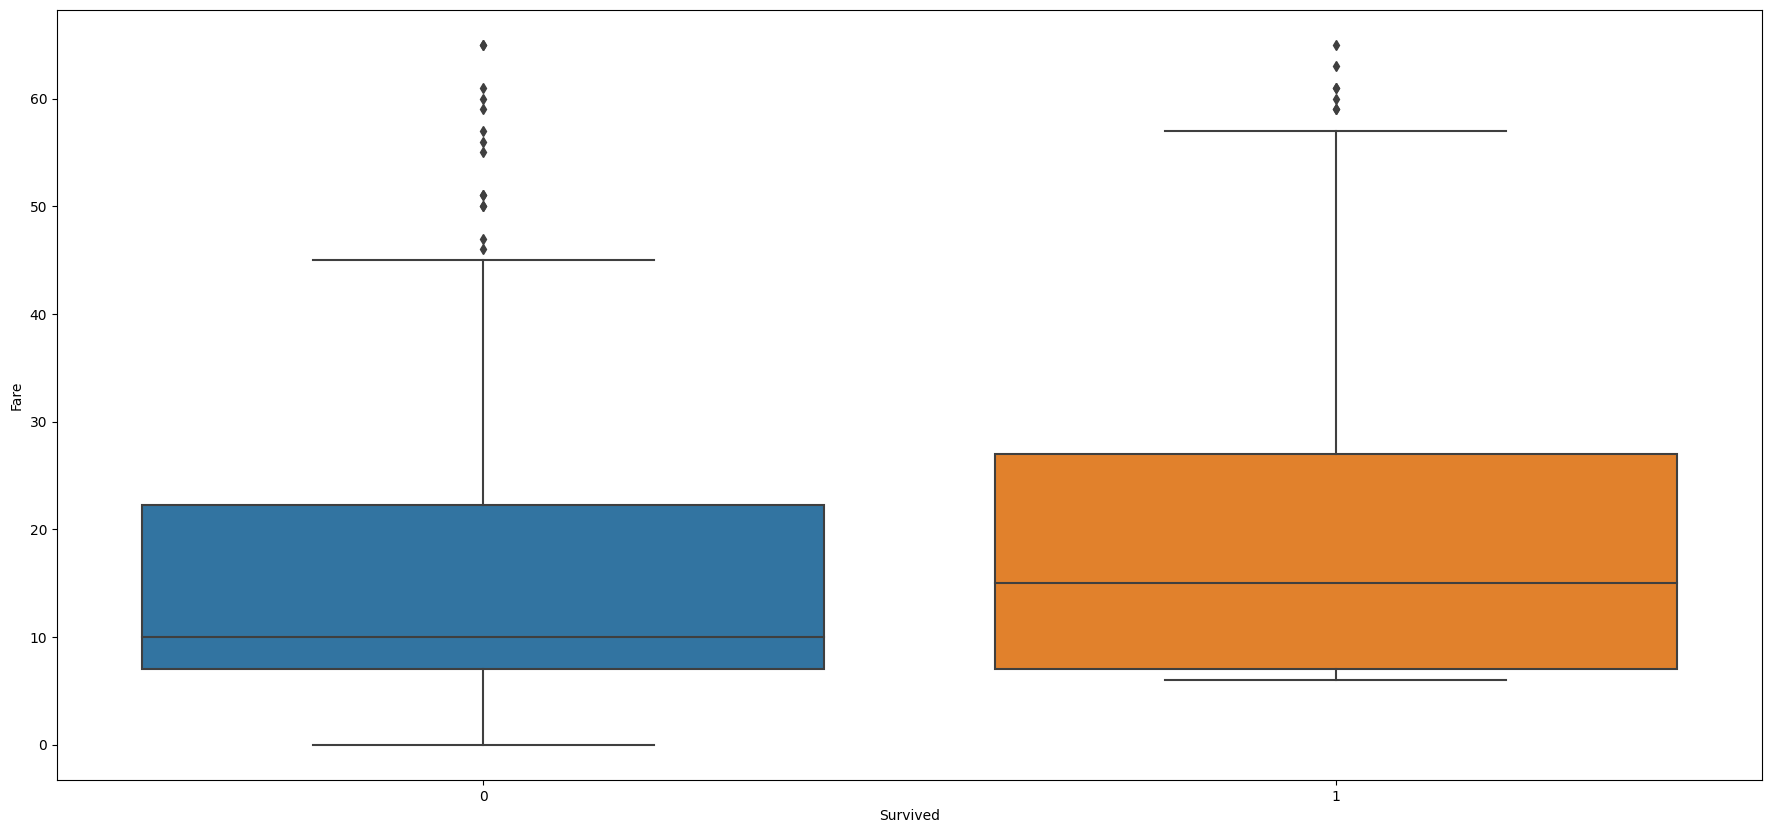

In [30]:
plt.figure(figsize=(22, 10))
sns.boxplot(data=df, x='Survived', y='Fare');

In [31]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1

lower_range = q1 - 1.5 * iqr
upper_range = q3 + 1.5 * iqr

outlier_indices = df[(df['Age'] < lower_range) | (df['Age'] > upper_range)].index

df = df.drop(outlier_indices)

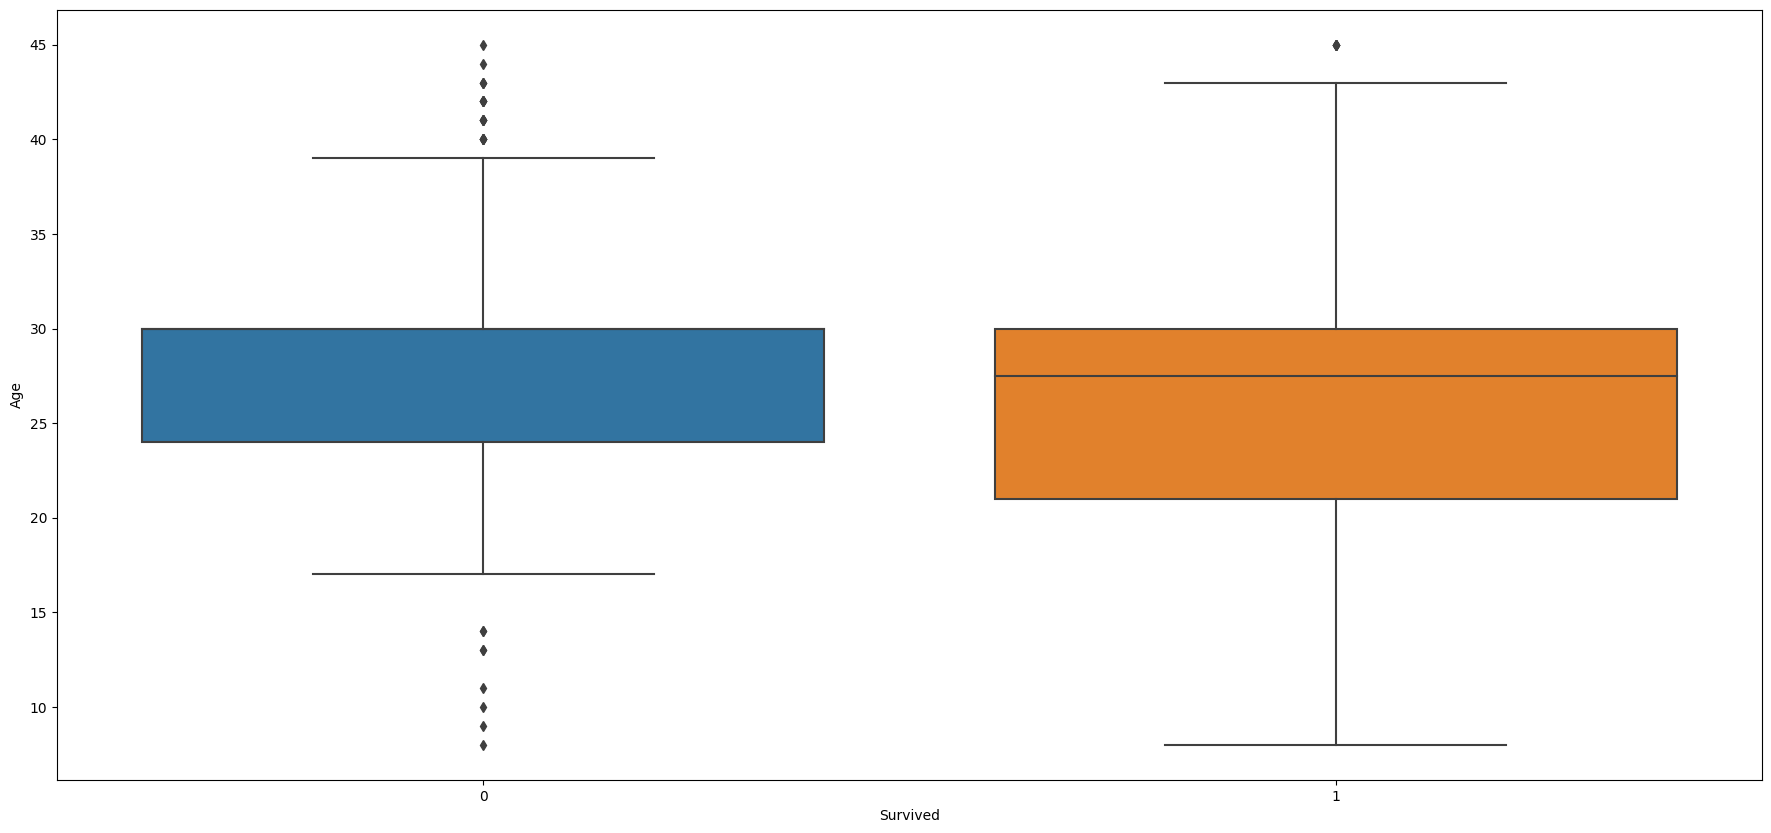

In [32]:
plt.figure(figsize=(22, 10))
sns.boxplot(data=df, x='Survived', y='Age');

In [33]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

In [35]:
X_train.shape

(255, 7)

In [36]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
baseline_mae = mean_absolute_error(y_train,y_pred_baseline)
print("Mean apt Survived:", y_mean)
print("Baseline MAE:", baseline_mae)

Mean apt Survived: 0.3333333333333333
Baseline MAE: 0.4444444444444445


In [37]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=2)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=2)

In [38]:
print('Training score: ', round(model_rf.score(X_train, y_train),3))
print('Testing score: ', round(model_rf.score(X_test, y_test),3))

Training score:  1.0
Testing score:  1.0


In [39]:
model_SVM = LinearSVC()
model_SVM.fit(X_train, y_train)
y_pred = model_SVM.predict(X_test)
accuracy_score(y_test, y_pred)

c:\Users\hassa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


1.0

In [40]:
print('Training score: ', round(model_SVM.score(X_train, y_train),3))
print('Testing score: ', round(model_SVM.score(X_test, y_test),3))

Training score:  1.0
Testing score:  1.0


In [41]:
model_LG = LogisticRegression( max_iter=200)
model_LG.fit(X_train, y_train)
y_pred = model_LG.predict(X_test)
accuracy_score(y_pred,y_test)

1.0

In [42]:
print('Training score: ', round(model_LG.score(X_train, y_train),3))
print('Testing score: ', round(model_LG.score(X_test, y_test),3))

Training score:  1.0
Testing score:  1.0
